# PA005: High Value Customer Identification (Insiders)

## 0.0 Solution Planning (IOT)

### Inputs

1. Business Problem
    - Select the most valuable customers to integrate a fidelity program.
    
2. Dataset
    - Sales of an online e-commerce along one year.

### Outputs

1. Identification of the people to integrate the insiders program.
    - List: client_id | is_insider |
               10323  | yes/1
               32514  | no/0

2. Report answering the business questions:
    - Who are the elegible people for the insiders program?
    - How many will integrate the insiders program?
    - What are the main characteristics of those clients?
    - What is the revenue percentage brought by those clients?
    - What is the expected revenue brought by those clients in the next few months?
    - What are the conditions to make a person elegible to the insiders program?
    - What are the conditions to remove a person from the insiders program?
    - Which warranty ensures the insiders program is better than the rest marketing plan?
    - What actions may the marketing team apply to raise the revenue?

### Tasks

1. Who are the elegible people for the insiders program?
    - What is being more valuable? What are the "highest value" clients?
    - Revenue:
        - High average ticket;
        - High LTV (lifetime value);
        - High frequency;
        - High basket size;
        - Low churn probability;
        - High LTV prediction;
        - High purchase probability;
        
    - Cost:
        - Low return rate;
        
    - Sales experience:
        - High average evaluation
        
2. How many will integrate the insiders program?
    - What is the total client number?
    - % of the insiders group
    
3. What are the main characteristics of those clients?
    - Describe client characteristics:
        - Age;
        - Location;
        
    - Describe consumption characteristics:
        - Clustering features;
        
4. What is the revenue percentage brought by those clients?
    - Anual total revenue;
    - Total anual revenue generated by the insiders;
    
5. What is the expected revenue brought by those clients in the next few months?
    - Insiders LTV;
    - Cohort analysis;
    
6. What are the conditions to make a person elegible to the insiders program?
    - Define frequency (1 month, 3 months)
    - The person must be similar to the other insiders
    
7. What are the conditions to remove a person from the insiders program?
    - Define frequency (1 month, 3 months)
    - The person must not be similar to the other insiders
    
8. Which warranty ensures the insiders program is better than the rest marketing plan?
    - A/B testing
    - A/B bayesean testing
    - Hyphotesis testing
    
9. What actions may the marketing team apply to raise the revenue?
    - Promotion
    - Purchase preference
    - Delivery cost
    - Company visit

### Solutions benchmark
#### 1. Desk Research

Research for methodologies that may be applied in this context

## 0.1. Imports

In [1]:
import numpy   as np
import pandas  as pd
import seaborn as sns

import umap.umap_ as umap

from matplotlib      import pyplot as plt
from IPython.display import HTML

from sklearn import cluster as c
from sklearn import metrics as m

from plotly import express as px

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

## 0.2. Helper Functions

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'ggplot' )
    plt.rcParams['figure.figsize'] = [24, 9]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()


jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## 0.3. Load Dataset

In [3]:
# load
df_raw = pd.read_csv('../data/raw/Ecommerce.csv', encoding='ISO-8859-1')

# drop extra column
df_raw = df_raw.drop(columns=['Unnamed: 8'], axis=1)

In [4]:
df_raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


# <font color='orange'> 1.0. Data Description </font>

In [5]:
df1 = df_raw.copy()

## 1.1. Rename Columns

In [6]:
cols_new = ['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date', 'unit_price', 'customer_id', 'country']

df1.columns = cols_new

## 1.2. Data Dimensions

In [7]:
print('Number of rows: {}'.format(df1.shape[0]))
print('Number of cols: {}'.format(df1.shape[1]))

Number of rows: 541909
Number of cols: 8


## 1.3. Data types

In [8]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

## 1.4. Check NA

In [9]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

## 1.5. Replace NA

In [10]:
# remove na
df1 = df1.dropna(subset=['description', 'customer_id'])
print('Removed data: {:.2f}'.format(1 - (df1.shape[0] / df_raw.shape[0]) ))

Removed data: 0.25


In [11]:
df1.isna().sum()

invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

## 1.6. Change dtypes

In [12]:
# invoice date
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'], format='%d-%b-%y')

# customer id
df1['customer_id'] = df1['customer_id'].astype(int)

df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850,United Kingdom


In [13]:
df1.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
customer_id              int64
country                 object
dtype: object

## 1.7. Descriptive Statistics

# <font color='orange'> 2.0. Feature Engineering </font>

In [14]:
df2 = df1.copy()

## 2.1. Feature Creation

In [15]:
df2.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850,United Kingdom


In [16]:
# Gross Revenue = quantity * price
df2['gross_revenue'] = df2['quantity'] * df2['unit_price']

# data reference
df_ref = df2.drop(['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date', 'unit_price', 'country', 'gross_revenue'], axis=1).drop_duplicates(ignore_index=True)

# ---------------

# Monetary
df_monetary = df2[['customer_id', 'gross_revenue']].groupby('customer_id').sum().reset_index()
df_ref = pd.merge(df_ref, df_monetary, on='customer_id', how='left')

# Recency - how many days since last purchase
df_recency = df2[['customer_id', 'invoice_date']].groupby('customer_id').max().reset_index()
df_recency['recency_days'] = (df2['invoice_date'].max() - df_recency['invoice_date']).dt.days

df_recency = df_recency[['customer_id', 'recency_days']].copy()
df_ref = pd.merge(df_ref, df_recency, on='customer_id', how='left')

# Frequency
df_freq = df2[['customer_id', 'invoice_no']].drop_duplicates().groupby('customer_id').count().reset_index()
df_ref = pd.merge(df_ref, df_freq, on='customer_id', how='left')

# Avg Ticket
df_avg_ticket = df2[['customer_id', 'gross_revenue']].groupby('customer_id').mean().reset_index().rename(columns={'gross_revenue': 'avg_ticket'})
df_ref = pd.merge(df_ref, df_avg_ticket, on='customer_id', how='left')

# <font color='orange'> 3.0. Data Filtering </font>

In [17]:
df3 = df_ref.copy()

# <font color='orange'> 4.0. Exploratory Data Analysis </font>

In [18]:
df4 = df3.copy()

# <font color='orange'> 5.0. Data Preparation </font>

In [19]:
df5 = df4.copy()

# <font color='orange'> 6.0. Feature Selection </font>

In [20]:
df6 = df5.copy()

# <font color='orange'> 7.0. Hyperparameter Fine Tunning </font>

In [21]:
X = df6.drop(columns=['customer_id'])

In [22]:
clusters = [2, 3, 4, 5, 6, 7]

## 7.1. Within-Cluster Sum of Square (WSS)

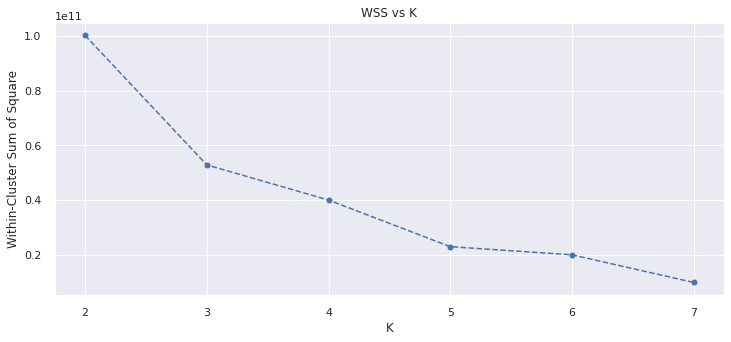

In [23]:
wss = []

for k in clusters:
    # model definition
    kmeans = c.KMeans(init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42)
    
    # model training
    kmeans.fit(X)
    
    # validation
    wss.append(kmeans.inertia_)
    
# Plot WSS - elbow method
plt.figure(figsize=(12,5))
plt.plot(clusters, wss, ls='--', marker='o', color='b')
plt.xlabel('K');
plt.ylabel('Within-Cluster Sum of Square');
plt.title('WSS vs K');

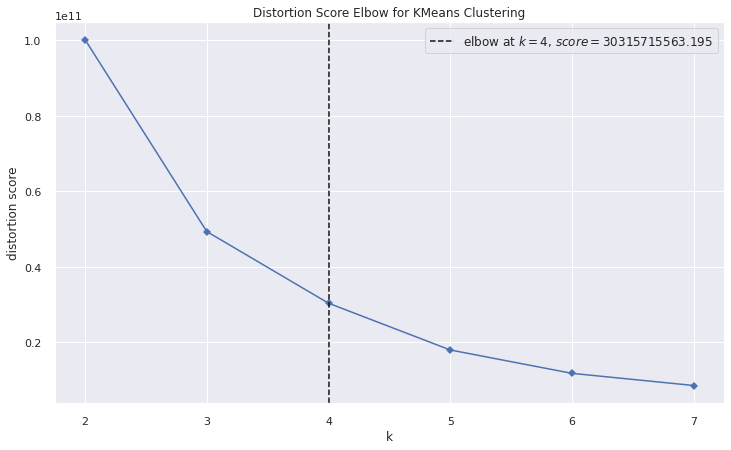

In [24]:
kmeans = KElbowVisualizer(c.KMeans(), k=clusters, timings=False)

plt.figure(figsize=(12,7))
kmeans.fit(X)
kmeans.show();

## 7.2. Sillhouette Score

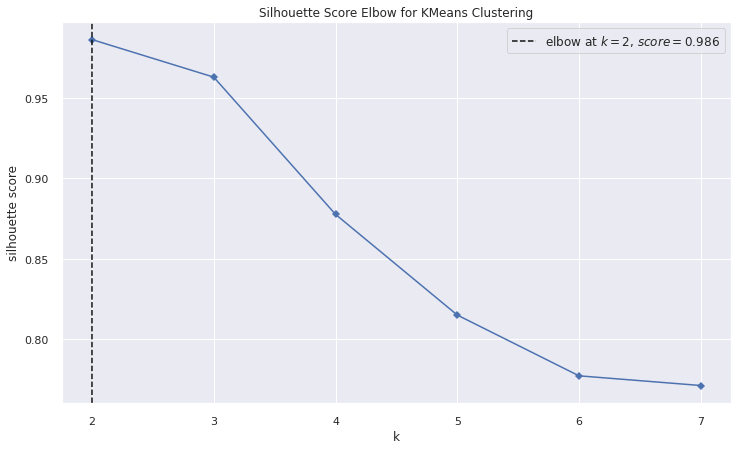

In [25]:
kmeans = KElbowVisualizer(c.KMeans(), k=clusters, metric='silhouette', timings=False)

plt.figure(figsize=(12,7))
kmeans.fit(X)
kmeans.show();

### 7.2.1. Silhouette Analysis

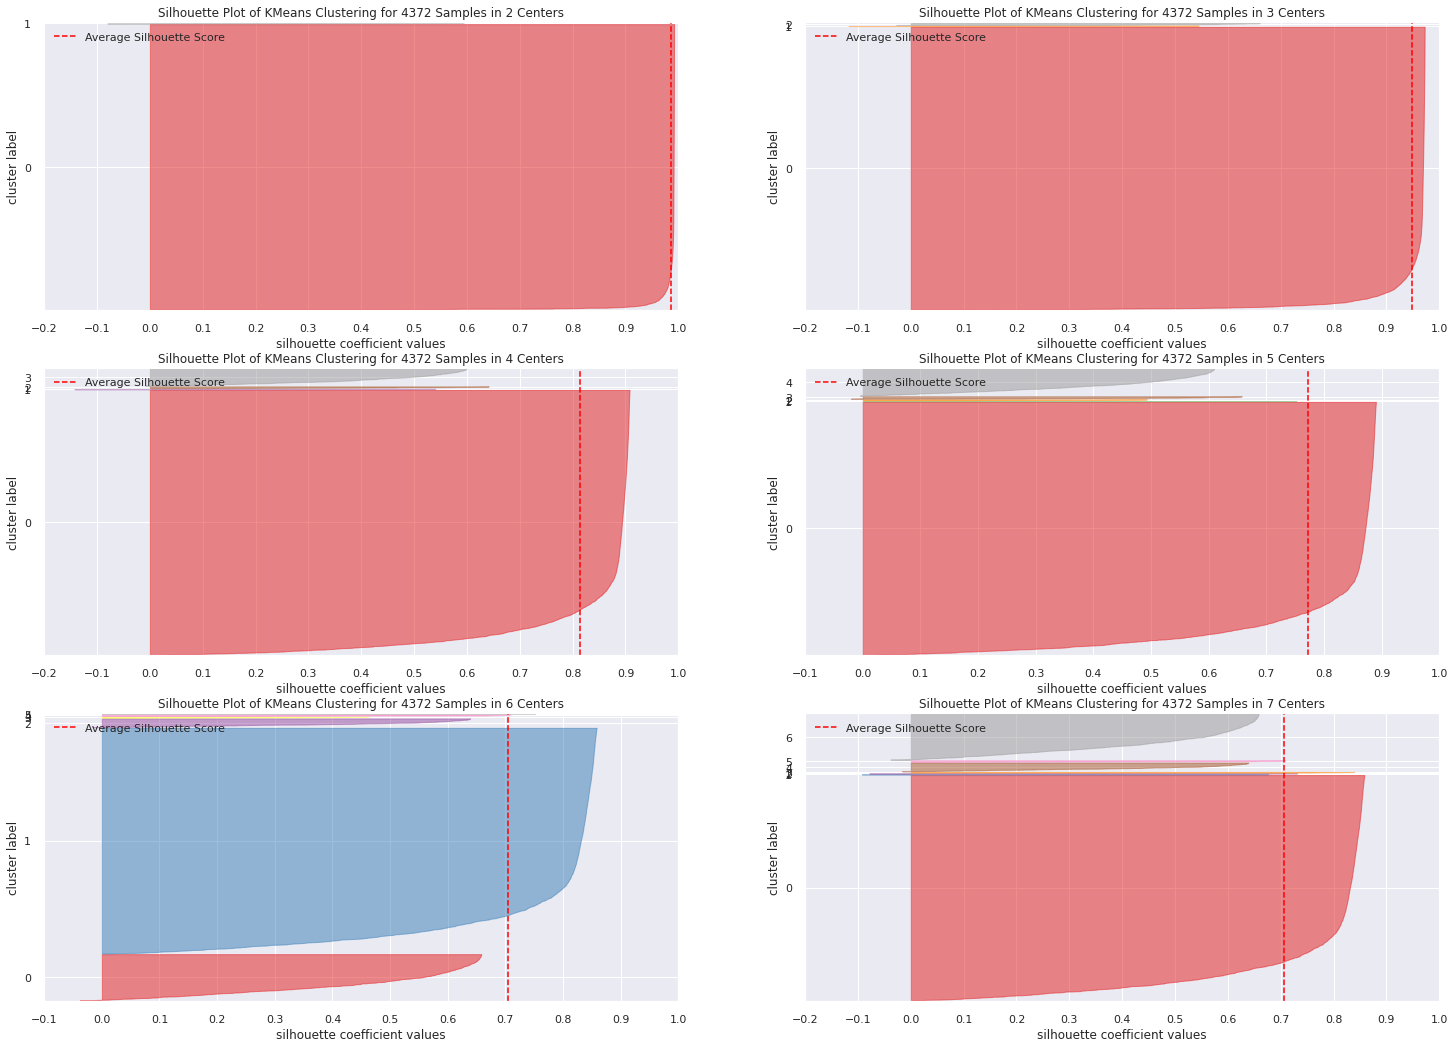

In [26]:
fig, ax = plt.subplots(3, 2, figsize=(25,18))

for k in clusters:   
    
    km = c.KMeans(n_clusters=k, init='random', n_init=10, max_iter=100, random_state=42)
    
    # divisao por moda
    q, mod = divmod(k, 2)
    
    visualizer = SilhouetteVisualizer(km, color='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)
    visualizer.finalize()

# <font color='orange'> 8.0. Model Training </font>

## 8.1. K-Means

In [27]:
# model definition
k = 4
kmeans = c.KMeans(init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42)

# model training
kmeans.fit(X)

# clustering
labels = kmeans.labels_

## 8.2. Cluster Validation

In [28]:
# WSS (Within-Cluster sum of square)
print('WSS value: {}'.format(kmeans.inertia_))

# SS (Silhouette score)
print('SS value: {}'.format(m.silhouette_score(X, labels, metric='euclidean')))

WSS value: 40056506734.60248
SS value: 0.8139972028952444


# <font color='orange'> 9.0. Cluster Analysis </font>

In [29]:
df9 = df6.copy()
df9['cluster'] = labels
df9.head()

,customer_id,gross_revenue,recency_days,invoice_no,avg_ticket,cluster
0,17850,5288.63,302,35,16.950737,3
1,13047,3079.10,31,18,15.709694,0
2,12583,7187.34,2,18,28.634821,3
3,13748,948.25,95,5,33.866071,0
4,15100,635.10,330,6,105.850000,0


## 9.1. Visual inspection

### 9.1.1. Silhouette Score

/home/debora/.local/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


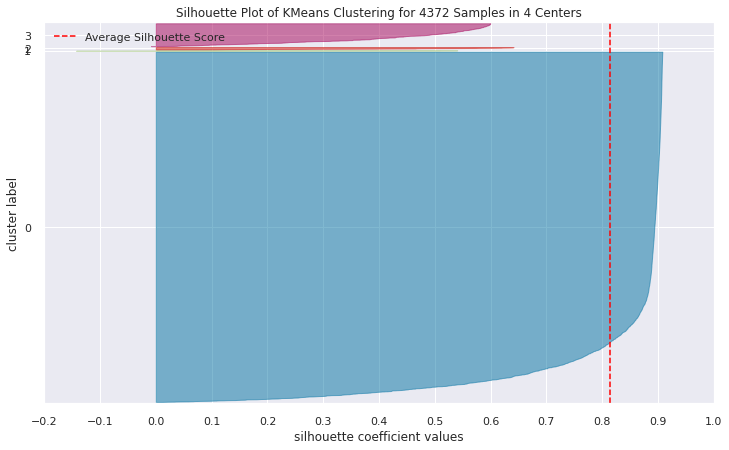

In [30]:
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

plt.figure(figsize=(12,7))
visualizer.fit(X)
visualizer.finalize()

### 9.1.2. 2D Plot

<Figure size 1152x720 with 0 Axes>

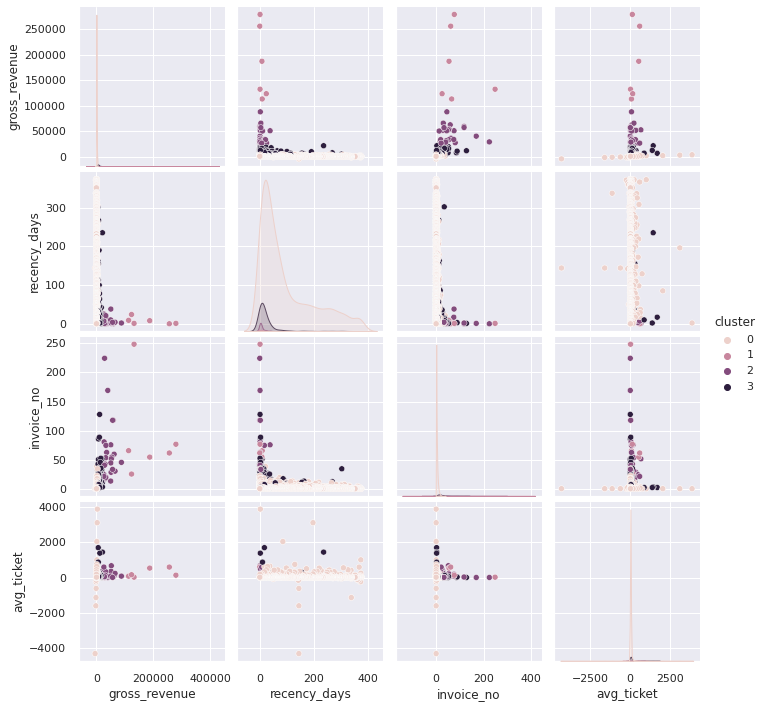

In [31]:
df_viz = df9.drop(columns='customer_id', axis=1)

plt.figure(figsize=(16,10))
sns.pairplot(df_viz, hue='cluster');

## Machine Learning - Manifold

PCA - Matrix, Espaço de distância - Espaço de Hilbert - 9 condiçoes - Corolários

UMAP, t-SNE (2009) - Manifold - Topologia

### 9.1.3. UMAP

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

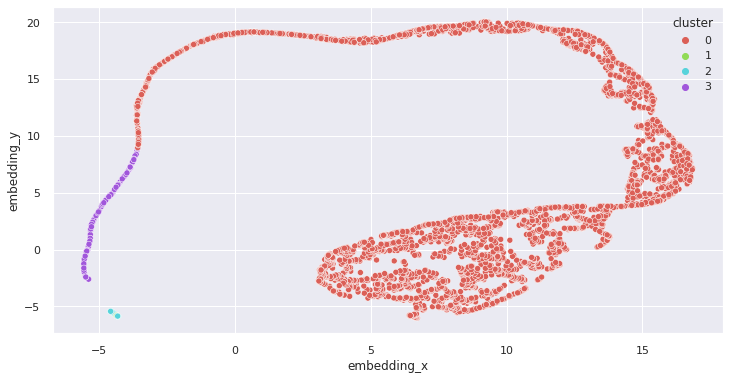

In [32]:
reducer = umap.UMAP(n_neighbors=20, random_state=42)
embedding = reducer.fit_transform(X)

# embedding
df_viz['embedding_x'] = embedding[:, 0]
df_viz['embedding_y'] = embedding[:, 1]

# plot UMAP
plt.figure(figsize=(12,6))
sns.scatterplot(x='embedding_x', y='embedding_y', 
                hue='cluster', 
                palette=sns.color_palette('hls', n_colors=len(df_viz['cluster'].unique())), 
                data=df_viz)

### 9.1.3. t-SNE

## 9.2. Cluster Profile

In [34]:
# Number of customer
df_cluster = df9[['customer_id', 'cluster']].groupby('cluster').count().reset_index()
df_cluster['perc_customer'] = 100 * (df_cluster['customer_id'] / df_cluster['customer_id'].sum())

# Avg gross revenue
df_avg_gross_revenue = df9[['gross_revenue', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_gross_revenue, how='inner', on='cluster')


# Avg recency days
df_avg_recency_days = df9[['recency_days', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_recency_days, how='inner', on='cluster')


# Avg invoice number
df_avg_invoice_no = df9[['invoice_no', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_invoice_no, how='inner', on='cluster')

# Avg ticket
df_ticket = df9[['avg_ticket', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_ticket, how='inner', on='cluster')

df_cluster

,cluster,customer_id,perc_customer,gross_revenue,recency_days,invoice_no,avg_ticket
0,0,4071,93.115279,946.696250,96.969295,3.641120,25.359654
1,1,6,0.137237,182181.981667,7.166667,89.000000,253.626345
2,2,28,0.640439,42614.387143,6.178571,57.821429,162.862605
3,3,267,6.107045,8089.028652,20.280899,19.528090,62.783157


### Cluster 01:
- Number of customers: ( 93.11 %)
- Avg recency:  96 days
- Avg purchase number: 3 purchases
- Avg gross revenue: 946,69 dollars
- Avg ticket: 25,35 dollars

### Cluster 02 (Insider candidate):
- Number of customers: ( 0.13 %)
- Avg recency: 7 days
- Avg purchase number: 89 purchases
- Avg gross revenue: 182.181,98 dollars
- Avg ticket: 253.626 dollars

### Cluster 03:
- Number of customers: ( 0.64 %)
- Avg recency: 6 days
- Avg purchase number: 57 purchases
- Avg gross revenue: 42.614,38 dollars
- Avg ticket: 162,86 dollars

### Cluster 04:
- Number of customers: ( 6.10 %)
- Avg recency: 20 days
- Avg purchase number: 19 purchases
- Avg gross revenue: 8.089,02 dollars
- Avg ticket: 62,78 dollars


# <font color='orange'> 10.0. Deploy to Production </font>